# 8 Queens Problem

In [1]:
from itertools import permutations, combinations
import copy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n = 8 # 8 Queens Problem

##### Find all the possible positions of 8 queens on the chessboard such that there is 1 queen per row and 1 queen per column.

In [3]:
x = range(1,n+1)

list = []

for i in permutations(x):
    y = i
    nlist = []
    for xval,yval in zip(x,y):
        nlist.append((xval,yval))
    list.append(nlist)
print("Total Combinations =>",len(list))

Total Combinations => 40320


There are 40320 combinations for placing 8 queens on a chessboard such that there is 1 queen per row and 1 queen per column.

##### Now we check and remove the combinations in which any two or more queens can get attacked diagonally.

In [4]:
def dia(p1,p2):
    x1 = p1[0]
    x2 = p2[0]
    y1 = p1[1]
    y2 = p2[1]
    
    slope = (y2-y1) / (x2-x1)
    
    if slope == 1 or slope == -1:
        return True
    else:
        return False

In [5]:
sol =[]

for i in list:
    clash=[]
    for p1,p2 in combinations(i,2):
        clash.append(dia(p1,p2))
    
    if True not in clash:
        sol.append(i)

sol = [set(s) for s in sol]
print("Total Solutions =>",len(sol))

Total Solutions => 92


There are 92 combinations in which 8 queens can be placed on a chessboard such that there is 1 queen per row and 1 queen per column and no queen have any other queen on its diagonals.

##### But there would be many symmetrically related solutions. ( C4, Rotational or Mirror Symmetry). We can even remove those.

In [6]:
def c4(p):
    pts = []
    for i in p:
        x,y = i
        pts.append(((n+1)-y, x))
    return set(pts)

In [7]:
def mirror(p):
    pts =[]
    for i in p:
        x,y = i
        pts.append((y,x))
    return set(pts)

In [8]:
def symm(sol):
    eqsol = []
    eqsol.append(sol)
    eqsol.append(mirror(sol))
    eqsol.append(c4(sol))
    eqsol.append(mirror(c4(sol)))
    eqsol.append(c4(c4(sol)))
    eqsol.append(mirror(c4(c4(sol))))
    eqsol.append(c4(c4(c4(sol))))
    eqsol.append(mirror(c4(c4(c4(sol)))))
    return eqsol

In [9]:
unique = cp.deepcopy(sol)
for N,s in enumerate(sol):
    found = False
    for i in symm(s):
        if i in sol[N+1:]:
            found = True
            break
    if found:
        unique.remove(s)
print("Total Unique Solutions =>",len(unique))        

Total Unique Solutions => 12


There are 12 unique solutions to the 8-Queens Problem.

##### Visualising Solutions

In [10]:
unique

[{(1, 6), (2, 3), (3, 7), (4, 4), (5, 1), (6, 8), (7, 2), (8, 5)},
 {(1, 6), (2, 4), (3, 1), (4, 5), (5, 8), (6, 2), (7, 7), (8, 3)},
 {(1, 6), (2, 4), (3, 7), (4, 1), (5, 8), (6, 2), (7, 5), (8, 3)},
 {(1, 7), (2, 2), (3, 4), (4, 1), (5, 8), (6, 5), (7, 3), (8, 6)},
 {(1, 7), (2, 2), (3, 6), (4, 3), (5, 1), (6, 4), (7, 8), (8, 5)},
 {(1, 7), (2, 3), (3, 1), (4, 6), (5, 8), (6, 5), (7, 2), (8, 4)},
 {(1, 7), (2, 3), (3, 8), (4, 2), (5, 5), (6, 1), (7, 6), (8, 4)},
 {(1, 7), (2, 4), (3, 2), (4, 5), (5, 8), (6, 1), (7, 3), (8, 6)},
 {(1, 7), (2, 4), (3, 2), (4, 8), (5, 6), (6, 1), (7, 3), (8, 5)},
 {(1, 7), (2, 5), (3, 3), (4, 1), (5, 6), (6, 8), (7, 2), (8, 4)},
 {(1, 8), (2, 3), (3, 1), (4, 6), (5, 2), (6, 5), (7, 7), (8, 4)},
 {(1, 8), (2, 4), (3, 1), (4, 3), (5, 6), (6, 2), (7, 7), (8, 5)}]

These are the coordinates of the queens to be placed on the chessboard.

In [14]:
def plotsol(p):
    z1 = np.zeros(n*n).reshape(n,n)
    for r,x in enumerate(z1):
        for c,y in enumerate(x):
            if (r+c) % 2 == 0:
                z1[r,c] = 1
    plt.imshow(z1, cmap = plt.cm.gray, interpolation = "nearest",extent=(0.5, n + 0.5, 0.5, n + 0.5))
    
    row = range(1, n + 1)
    col = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"]
    plt.xticks(range(1, n + 1), col)
    plt.yticks(range(1, n + 1), row)
    plt.xlim(0.5, n + 0.5)
    plt.ylim(0.5, n + 0.5)
        
    for i in p:
        plt.scatter(*i, color = "r", s = 500)

In [15]:
def solplot(list):
    plt.gcf().set_size_inches(20,20)
    
    for N,s in enumerate(list):
        plt.subplot(4,4,N+1)
        plotsol(s)

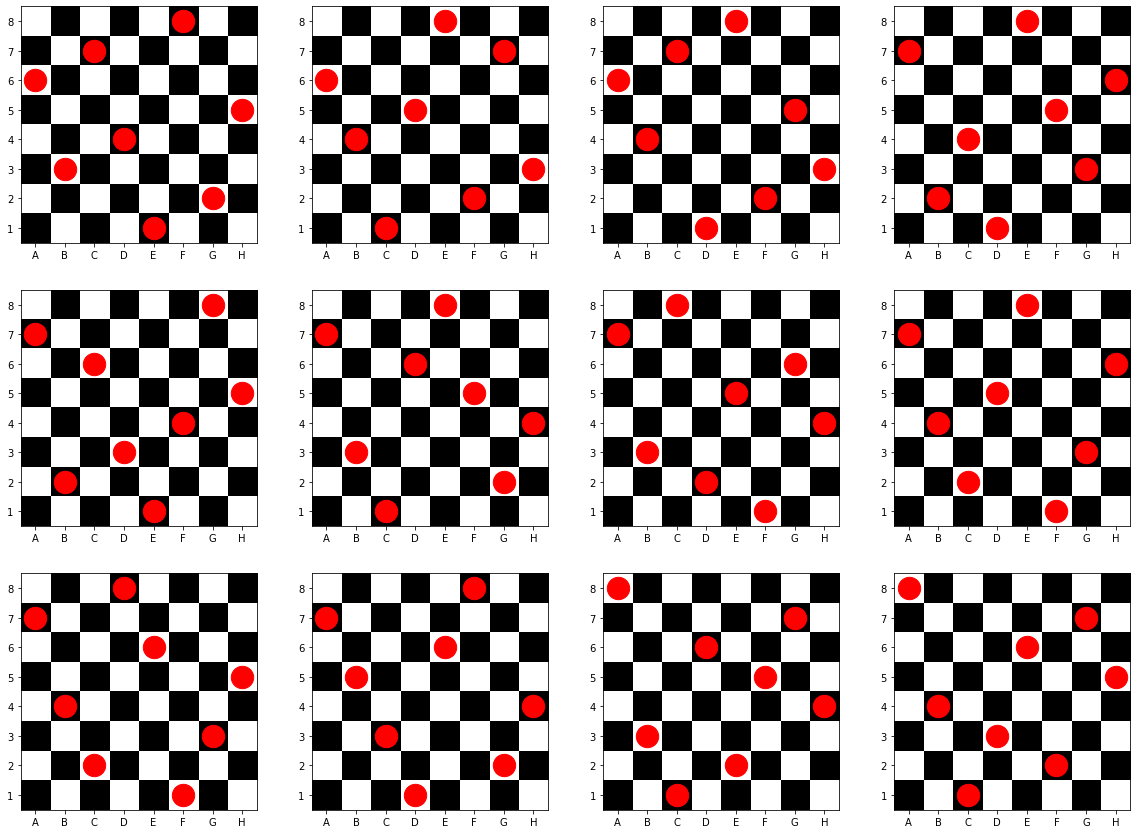

In [16]:
solplot(unique)

## Here are the 12 chessboards solving the 8-Queens Problem

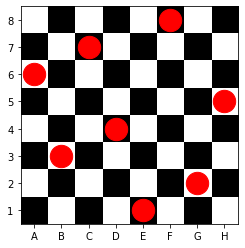

In [22]:
plotsol(unique[0])

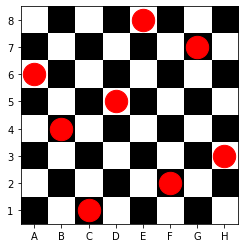

In [23]:
plotsol(unique[1])

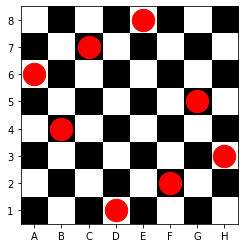

In [24]:
plotsol(unique[2])

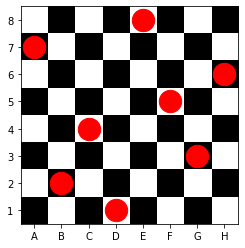

In [25]:
plotsol(unique[3])

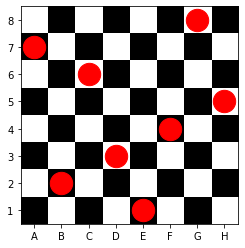

In [26]:
plotsol(unique[4])

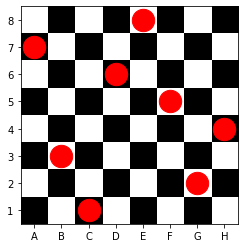

In [27]:
plotsol(unique[5])

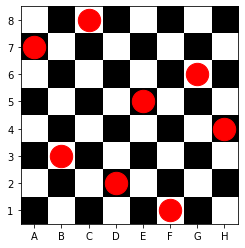

In [28]:
plotsol(unique[6])

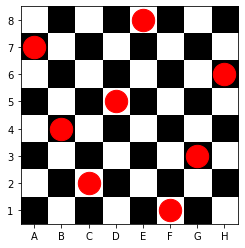

In [29]:
plotsol(unique[7])

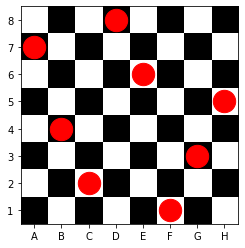

In [30]:
plotsol(unique[8])

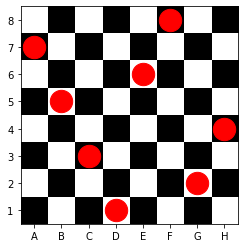

In [31]:
plotsol(unique[9])

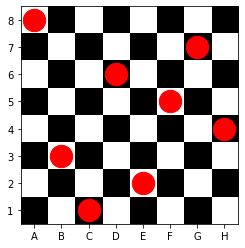

In [32]:
plotsol(unique[10])

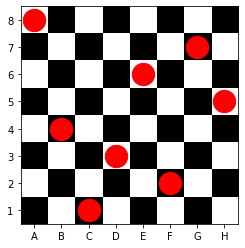

In [33]:
plotsol(unique[11])